In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
import numpy as np
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools as it

import pathlib
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import interpolate as inp
from scipy import optimize as op
import os, glob2,time

np.seterr(all='raise');

In [2]:
#J: I don't know what these functions do yet

def convertGenotypeToInt(genotype):
	out = 0
	for bit in genotype:
		out = (out << 1) | bit
	return out
def convertIntToGenotype(anInt, pad):
	offset = 2**pad
	return [int(x) for x in bin(offset+anInt)[3:]]	

In [3]:
#J: imports raw data of fitness at temperatures

df_raw = pd.read_csv('../weinreich_temp.csv')

In [4]:
df_raw

,G4205A,A42G,E104K,M182T,G238S,MIC_20,MIC_25,MIC_30,MIC_35,MIC_37,MIC_41
0,-,-,-,-,-,11.300,5.650,2.000,0.175,0.090,0.015635
1,-,-,-,-,+,724.450,256.125,256.125,2.000,1.000,0.175000
2,-,-,-,+,-,11.300,8.000,4.000,0.125,0.125,0.020000
3,-,-,-,+,+,724.450,256.125,512.250,64.030,90.550,5.650000
4,-,-,+,-,-,22.650,11.300,11.300,0.175,0.250,0.090000
5,-,-,+,-,+,4098.000,2049.000,2897.700,362.200,45.300,1.400000
6,-,-,+,+,-,16.010,11.300,16.010,0.250,0.250,0.125000
7,-,-,+,+,+,8096.000,4098.000,4098.000,1448.700,1024.500,362.200000
8,-,+,-,-,-,16.010,5.650,5.650,0.090,0.125,0.045000
9,-,+,-,-,+,1024.500,724.450,724.450,128.060,181.100,5.650000


In [5]:
lst = list(it.product([0,1],repeat=5))
print(lst)

[(0, 0, 0, 0, 0), (0, 0, 0, 0, 1), (0, 0, 0, 1, 0), (0, 0, 0, 1, 1), (0, 0, 1, 0, 0), (0, 0, 1, 0, 1), (0, 0, 1, 1, 0), (0, 0, 1, 1, 1), (0, 1, 0, 0, 0), (0, 1, 0, 0, 1), (0, 1, 0, 1, 0), (0, 1, 0, 1, 1), (0, 1, 1, 0, 0), (0, 1, 1, 0, 1), (0, 1, 1, 1, 0), (0, 1, 1, 1, 1), (1, 0, 0, 0, 0), (1, 0, 0, 0, 1), (1, 0, 0, 1, 0), (1, 0, 0, 1, 1), (1, 0, 1, 0, 0), (1, 0, 1, 0, 1), (1, 0, 1, 1, 0), (1, 0, 1, 1, 1), (1, 1, 0, 0, 0), (1, 1, 0, 0, 1), (1, 1, 0, 1, 0), (1, 1, 0, 1, 1), (1, 1, 1, 0, 0), (1, 1, 1, 0, 1), (1, 1, 1, 1, 0), (1, 1, 1, 1, 1)]


In [6]:
#J: Inputs raw data into a table formatted differently, but the genotype input is a little screwy.

df=pd.DataFrame(columns=['Temp','MIC','Genotype'])

df['Genotype']=np.repeat(lst,6,axis=0).tolist()


temps=np.array([20,25,30,35,37,41])

df['Temp'] =np.repeat([temps],2**5,axis=0).flatten()

df['MIC'] = df_raw.iloc[:-1,6:].values.flatten()

df['Genotype_Int'] = [convertGenotypeToInt(l) for l in df['Genotype']]


ValueError: Length of values (155) does not match length of index (192)

In [7]:
g = sns.lineplot('Temp','MIC',data=df,hue='Genotype_Int')
g.set_yscale('log')

/Users/jakemarglous/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret value `Genotype_Int` for parameter `hue`

/Users/jakemarglous/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/jakemarglous/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


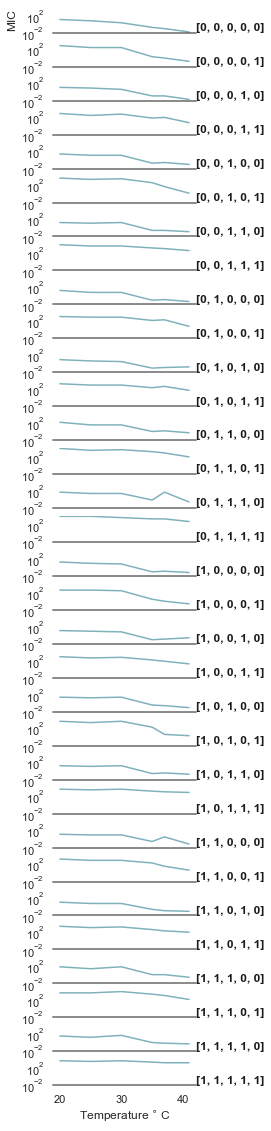

In [8]:

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})



# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="Genotype_Int",hue= "Genotype_Int",aspect=6, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.lineplot ,'Temp','MIC', alpha=1,color=pal[1]).set(yscale ='log',ylim=(0.01, 10000))
#g.map(plt.fill_between ,'Temp','MIC', alpha=1,color=pal[1]).set(yscale ='log',ylim=(0.01, 10000))
#g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0.01, lw=2,color='k', clip_on=False,alpha=.5)


#Define and use a simple function to label the plot in axes coordinates
def label(x,color, label):
    ax = plt.gca()
    ax.text(1, .2, convertIntToGenotype(int(label),5), fontweight="bold",color='k',
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Genotype_Int")
ax = g.facet_axis(-1,0)
ax.set_xlabel('Temperature $^{\circ}$ C')


# Set the subplots to overlap
g.fig.subplots_adjust(hspace=.3)

# Remove axes details that don't play well with overlap
g.set_titles("")
#g.set(yticks=[])
g.despine(bottom=True, left=True)



ax = g.facet_axis(0,0)
ax.set_ylabel('MIC')



g.savefig('weinreich_ridge.pdf',facecolor=ax.get_facecolor(), edgecolor='none' )

In [9]:
pal[0]


[0.5632111255041908, 0.758620966612444, 0.7764634182455044]

In [10]:
df['MIC'].max()

8096.0

In [12]:
G = nx.hypercube_graph(5)
H = nx.hypercube_graph(3)

In [13]:
pos = {(0,0,0,0,0): [.5,1],
       (1,0,0,0,0): [.1,.8],(0,1,0,0,0): [.3,.8],(0,0,1,0,0): [.5,.8],(0,0,0,1,0): [.7,.8],(0,0,0,0,1): [.9,.8],
      (1,1,0,0,0):[.05,.6],(1,0,1,0,0):[.15,.6],(1,0,0,1,0):[.25,.6],(1,0,0,0,1):[.35,.6],(0,1,1,0,0):[.45,.6],(0,1,0,1,0):[.55,.6],(0,1,0,0,1):[.65,.6],(0,0,1,1,0):[.75,.6],(0,0,1,0,1):[.85,.6],(0,0,0,1,1):[.95,.6],
      (1,1,1,0,0):[.05,.4],(1,1,0,1,0):[.15,.4],(1,1,0,0,1):[.25,.4],(1,0,1,1,0):[.35,.4],(1,0,1,0,1):[.45,.4],(1,0,0,1,1):[.55,.4],(0,1,1,1,0):[.65,.4],(0,1,1,0,1):[.75,.4],(0,1,0,1,1):[.85,.4],(0,0,1,1,1):[.95,.4],
      (1,1,1,1,0):[.1,.2],(1,1,1,0,1):[.3,.2],(1,1,0,1,1):[.5,.2],(1,0,1,1,1):[.7,.2],(0,1,1,1,1):[.9,.2],
      (1,1,1,1,1):[.5,0]}
print(pos)

{(0, 0, 0, 0, 0): [0.5, 1], (1, 0, 0, 0, 0): [0.1, 0.8], (0, 1, 0, 0, 0): [0.3, 0.8], (0, 0, 1, 0, 0): [0.5, 0.8], (0, 0, 0, 1, 0): [0.7, 0.8], (0, 0, 0, 0, 1): [0.9, 0.8], (1, 1, 0, 0, 0): [0.05, 0.6], (1, 0, 1, 0, 0): [0.15, 0.6], (1, 0, 0, 1, 0): [0.25, 0.6], (1, 0, 0, 0, 1): [0.35, 0.6], (0, 1, 1, 0, 0): [0.45, 0.6], (0, 1, 0, 1, 0): [0.55, 0.6], (0, 1, 0, 0, 1): [0.65, 0.6], (0, 0, 1, 1, 0): [0.75, 0.6], (0, 0, 1, 0, 1): [0.85, 0.6], (0, 0, 0, 1, 1): [0.95, 0.6], (1, 1, 1, 0, 0): [0.05, 0.4], (1, 1, 0, 1, 0): [0.15, 0.4], (1, 1, 0, 0, 1): [0.25, 0.4], (1, 0, 1, 1, 0): [0.35, 0.4], (1, 0, 1, 0, 1): [0.45, 0.4], (1, 0, 0, 1, 1): [0.55, 0.4], (0, 1, 1, 1, 0): [0.65, 0.4], (0, 1, 1, 0, 1): [0.75, 0.4], (0, 1, 0, 1, 1): [0.85, 0.4], (0, 0, 1, 1, 1): [0.95, 0.4], (1, 1, 1, 1, 0): [0.1, 0.2], (1, 1, 1, 0, 1): [0.3, 0.2], (1, 1, 0, 1, 1): [0.5, 0.2], (1, 0, 1, 1, 1): [0.7, 0.2], (0, 1, 1, 1, 1): [0.9, 0.2], (1, 1, 1, 1, 1): [0.5, 0]}


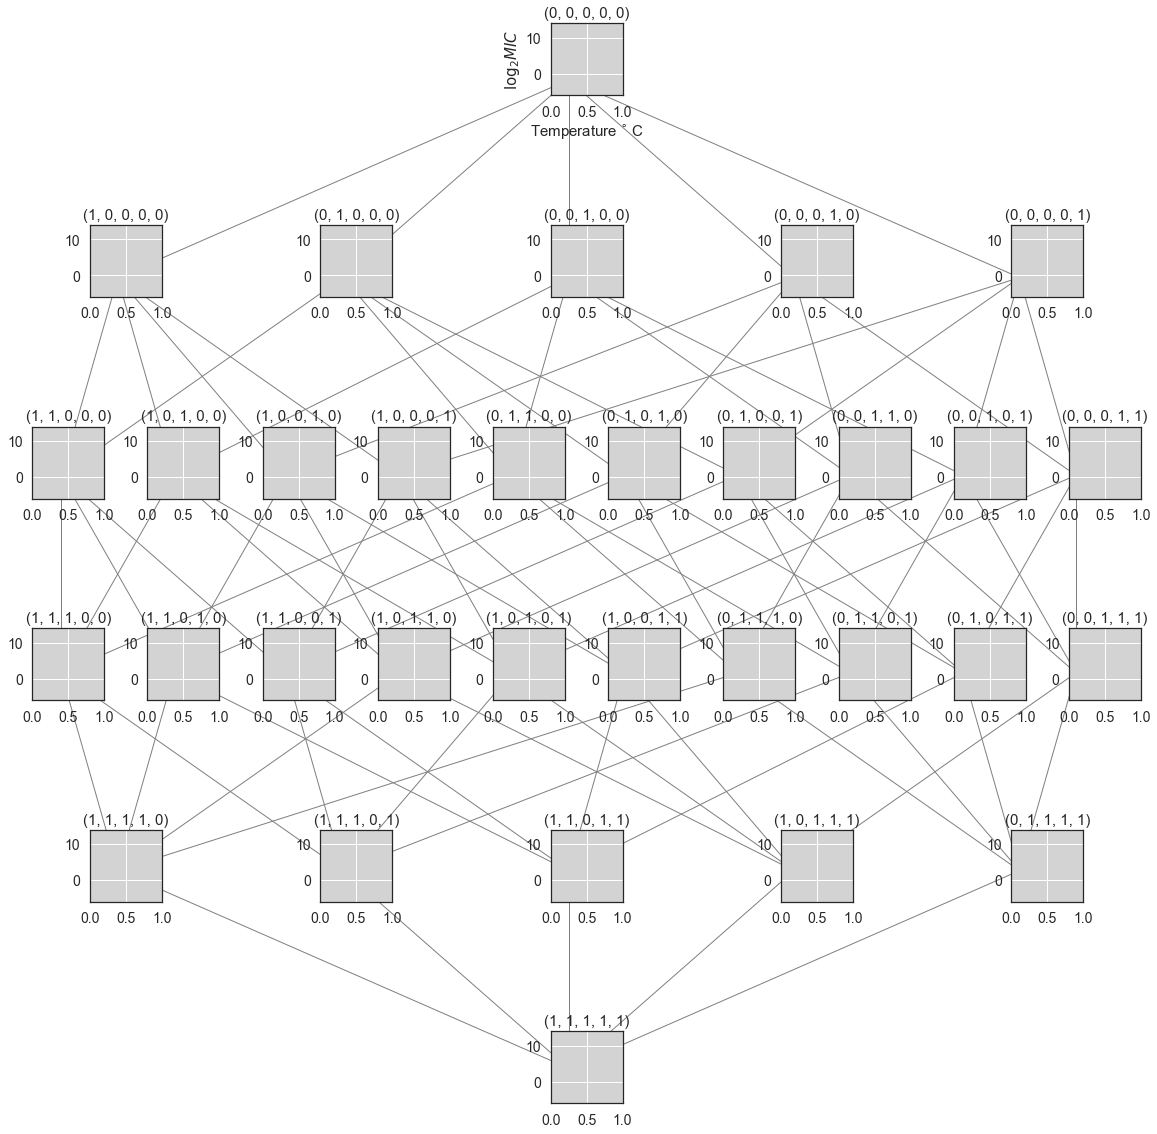

In [14]:
fig,ax=plt.subplots(figsize=(20,20))

for node in G:
    plt.axes([pos[node][0]+(.5-pos[node][0])*.2,pos[node][1] +(.45-pos[node][1])*.3 , .05, .05], 
             facecolor='lightgray')
    #plt.plot(df.loc[df['Genotype_Int'] ==convertGenotypeToInt(node),'Temp'],
             #np.log2(df.loc[df['Genotype_Int'] ==convertGenotypeToInt(node),'MIC']),lw=4)
    plt.ylim(-6,14)
    plt.title(str(node),fontsize=15)
    plt.grid(color='w')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    if node == (0,0,0,0,0):
        plt.xlabel('Temperature $^{\circ}$ C',fontsize=15)
        plt.ylabel('$\log_2 MIC$',fontsize=15)
    #ax= fig.add_subplot([*pos[node],.2,.2],zorder=-10)
nx.draw(G,pos=pos,node_size=0,ax=ax,edge_color='gray')
#plt.savefig('hypercube_ridge.png')

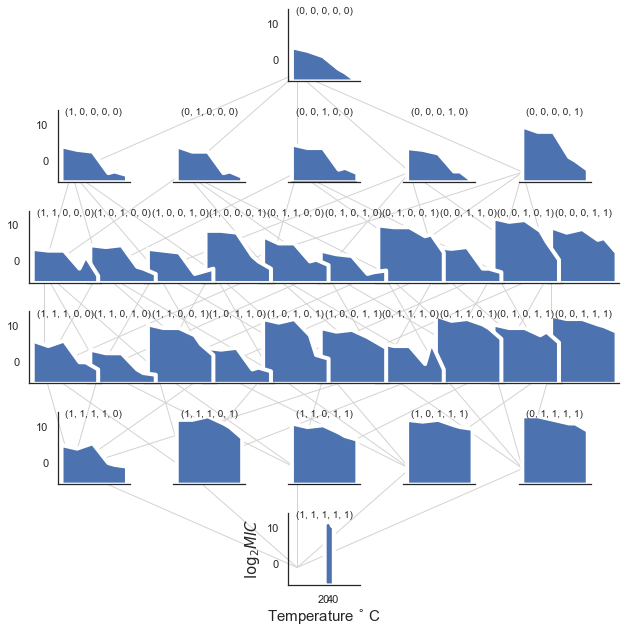

In [15]:
fig,ax=plt.subplots(figsize=(10,10))
nx.draw(G,pos=pos,node_size=0,ax=ax,edge_color='lightgray')
for node in G:
    ax=fig.add_axes([pos[node][0]+(.5-pos[node][0])*.2,pos[node][1] +(.45-pos[node][1])*.3 , .1, .1], 
             #facecolor='lightgray'
            )
    ax.fill_between(df.loc[df['Genotype_Int'] ==convertGenotypeToInt(node),'Temp'],-6,
             np.log2(df.loc[df['Genotype_Int'] ==convertGenotypeToInt(node),'MIC']),lw=4)
    ax.plot(df.loc[df['Genotype_Int'] ==convertGenotypeToInt(node),'Temp'],
             np.log2(df.loc[df['Genotype_Int'] ==convertGenotypeToInt(node),'MIC']),'w')
    ax.set_ylim(-6,14)
    ax.set_title(str(node),fontsize=10,y=.85)
    #plt.grid(color='w')
    
    
    ax.set_xticklabels([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if node != (0,0,0,0,0) and node != (1,1,1,1,1) and node != (1,0,0,0,0) and node != (1,1,0,0,0) and node != (1,1,1,0,0) and node !=(1,1,1,1,0):
        ax.spines['left'].set_visible(False)
        ax.set_yticks([])
        ax.set_xticks([20,40])
        ax.set_xticklabels([])
    #else:
        #ax.set_ylabel('$\log_2 MIC$',fontsize=15)
        

    

    if node == (1,1,1,1,1):
        ax.set_ylabel('$\log_2 MIC$',fontsize=15)
        ax.set_ylabel('$\log_2 MIC$',fontsize=15)
        ax.set_xlabel('Temperature $^{\circ}$ C',fontsize=15)
        ax.set_xticks([20,40])
        ax.set_xticklabels([20,40])
        #ax.text(.5,-.1,'Temperature $^{\circ}$ C')
        #ax.text(.4,.1,'$\log_2 MIC$',rotation=90)
    #    plt.xlabel('Temperature $^{\circ}$ C',fontsize=15)
    #    plt.gca().axison = True
    #    plt.ylabel('$\log_2 MIC$',fontsize=15)
    #ax= fig.add_subplot([*pos[node],.2,.2],zorder=-10)
plt.arrow(-55,105.9,150,0,clip_on=False,zorder=10,lw=.6,color='k')

plt.arrow(-55,21.9,150,0,clip_on=False,zorder=10,lw=.6,color='k')
plt.savefig('hypercube_ridge2.pdf')

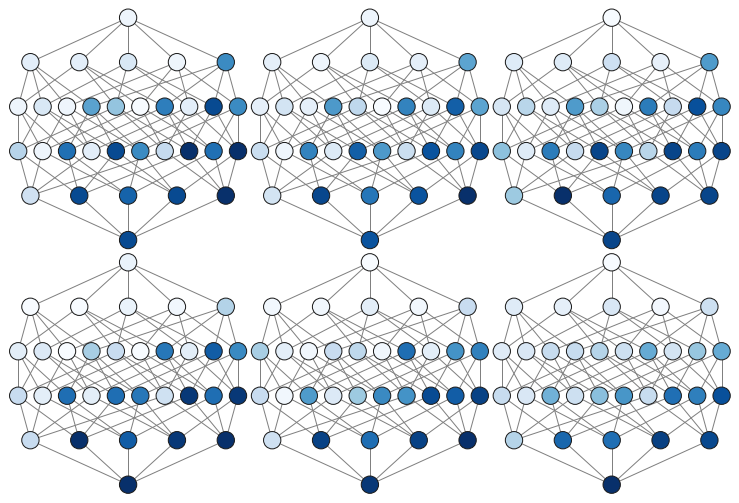

In [16]:
fig,axs=plt.subplots(2,3,figsize=(13,9))

vmin=np.log2(df['MIC']).min()
vmax=np.log2(df['MIC']).max()
peaks = [[6,12,14],[14,23,29],[14,23,29,6],[14,29,31],[14],[31]]
for ax,t,peak in zip(axs.flatten(),df['Temp'].unique(),peaks):
    #labe = nx.draw_networkx_labels(G,pos=pos,ax=ax)

    
    #ax.text(.6,1,'%d $^{\circ}$ C ' % (t),fontsize=15)
    nx.draw(G,pos=pos,edge_color='gray',edgecolors=np.repeat('k',2**5),cmap=plt.cm.Blues,node_color=np.log2(df.loc[df['Temp']==t,'MIC']),ax=ax)
    
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
#cax = fig.add_axes([0.9, 0.1, 0.01, 0.5])
#sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=vmin, vmax=vmax))
#sm.set_array([])
#cbar = fig.colorbar(sm,cax=cax,)
#cbar.set_label('$\log_2 MIC$', rotation=270,labelpad=20)
plt.savefig('hypercube_all_graphs.png')

NameError: name 'sm' is not defined

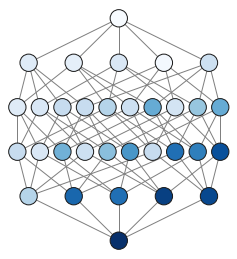

In [17]:
fig = plt.figure(figsize = [4, 4.5])
ax = fig.add_subplot(111)
ax = nx.draw(G,pos=pos,edge_color='gray',edgecolors=np.repeat('k',2**5),cmap=plt.cm.Blues,node_color=np.log2(df.loc[df['Temp']==t,'MIC']),ax=ax)

cbar = fig.colorbar(sm,cax=cax,)

plt.savefig("one_tesseract.png")

{(0, 0, 0): [0, 0], (1, 0, 0): [-0.5, 0.5], (0, 1, 0): [0, 0.5], (0, 0, 1): [0.5, 0.5], (1, 1, 0): [-0.5, 1], (1, 0, 1): [0, 1], (0, 1, 1): [0.5, 1], (1, 1, 1): [0, 1.5]}


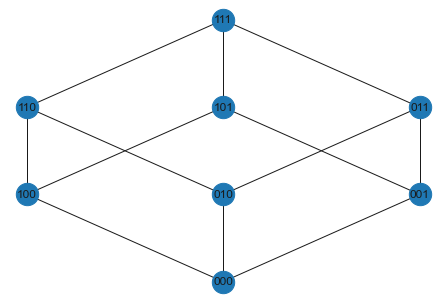

In [70]:
MICs = df.loc[df['Temp']==20, "MIC"]

MICs = MICs[::4]
print(MICs)
print(df)

0       11.30
24      22.65
48      16.01
72     128.00
96      16.01
120     22.65
144     11.30
168     64.03
Name: MIC, dtype: float64
     Temp       MIC         Genotype  Genotype_Int
0      20    11.300  [0, 0, 0, 0, 0]             0
1      25     5.650  [0, 0, 0, 0, 0]             0
2      30     2.000  [0, 0, 0, 0, 0]             0
3      35     0.175  [0, 0, 0, 0, 0]             0
4      37     0.090  [0, 0, 0, 0, 0]             0
..    ...       ...              ...           ...
187    25  2897.700  [1, 1, 1, 1, 1]            31
188    30  4098.000  [1, 1, 1, 1, 1]            31
189    35  2049.000  [1, 1, 1, 1, 1]            31
190    37  1448.700  [1, 1, 1, 1, 1]            31
191    41  1448.700  [1, 1, 1, 1, 1]            31

[192 rows x 4 columns]


{(0, 0, 0): [0, 0], (1, 0, 0): [-0.5, 0.5], (0, 1, 0): [0, 0.5], (0, 0, 1): [0.5, 0.5], (1, 1, 0): [-0.5, 1], (1, 0, 1): [0, 1], (0, 1, 1): [0.5, 1], (1, 1, 1): [0, 1.5]}


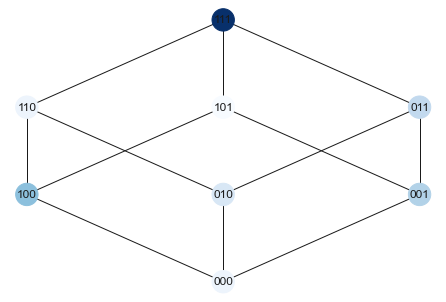

In [81]:
pos = {(0,0,0): [0,0],
       (1,0,0): [-.5, .5],(0,1,0): [0, .5],(0,0,1): [.5, .5],
      (1,1,0):[-.5, 1],(1,0,1):[0, 1],(0,1,1):[.5, 1],
      (1,1,1):[0, 1.5]}
print(pos)

label_dict = {(0,0,0): "000",
       (1,0,0): "100",(0,1,0): "010", (0,0,1): "001", (1,1,0):"110",(1,0,1):"101",(0,1,1):"011",(1,1,1):"111"}



node_colors = [5, 10, 7, 9, 12, 4, 5, 23]
nx.draw(H, pos = pos, node_size = 500, cmap=plt.cm.Blues, node_color= node_colors,with_labels = True, labels = label_dict)

plt.savefig("example_landscape.png")

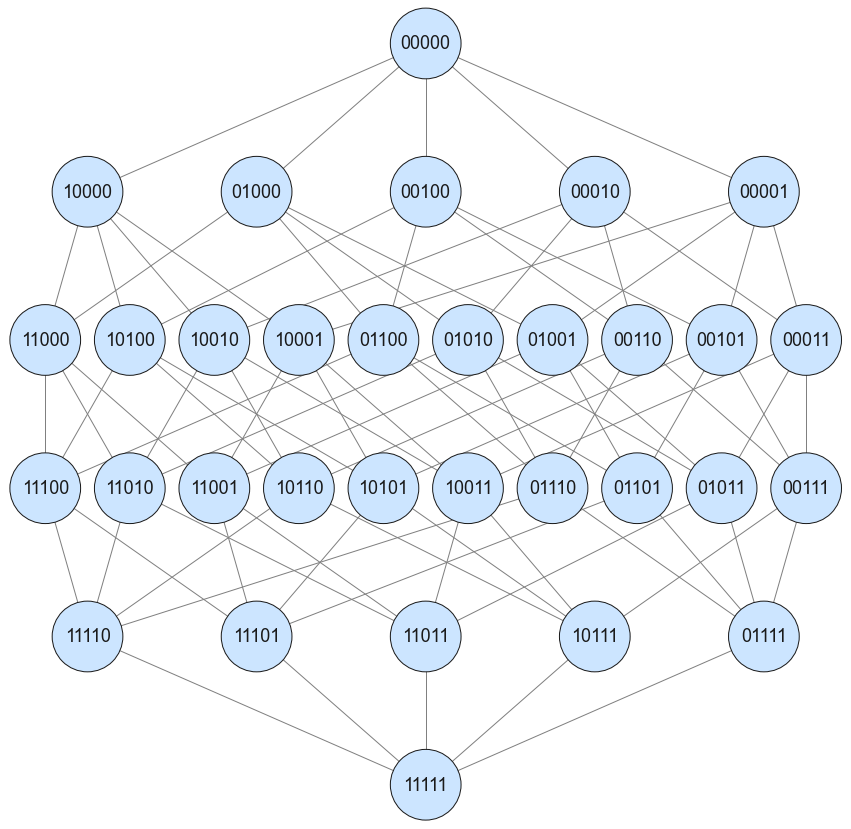

In [18]:
label_dict = {(0,0,0,0,0): "00000",
       (1,0,0,0,0): "10000",(0,1,0,0,0): "01000", (0,0,1,0,0): "00100",(0,0,0,1,0): "00010",(0,0,0,0,1): "00001",(1,1,0,0,0):"11000",(1,0,1,0,0):"10100",(1,0,0,1,0):"10010",(1,0,0,0,1):"10001",(0,1,1,0,0):"01100",(0,1,0,1,0):"01010",(0,1,0,0,1):"01001",(0,0,1,1,0):"00110",(0,0,1,0,1):"00101",(0,0,0,1,1):"00011",(1,1,1,0,0):"11100",(1,1,0,1,0):"11010",(1,1,0,0,1):"11001",(1,0,1,1,0):"10110",(1,0,1,0,1):"10101",(1,0,0,1,1):"10011",(0,1,1,1,0):"01110",(0,1,1,0,1):"01101",(0,1,0,1,1):"01011",(0,0,1,1,1):"00111",(1,1,1,1,0):"11110",(1,1,1,0,1):"11101",(1,1,0,1,1):"11011",(1,0,1,1,1):"10111",(0,1,1,1,1):"01111",(1,1,1,1,1):"11111"}

fig = plt.figure(figsize = [15, 15])
ax = fig.add_subplot(111)
nx.draw(G,pos=pos,edge_color='grey', edgecolors=np.repeat('k',2**5),node_color="#CCE5FF", node_size = 5000, ax=ax, with_labels = True, labels = label_dict, font_size = 18)

#fig.savefig("Tesseract_32.png")

In [16]:
df

,Temp,MIC,Genotype,Genotype_Int
0,20,11.300,"[0, 0, 0, 0, 0]",0
1,25,5.650,"[0, 0, 0, 0, 0]",0
2,30,2.000,"[0, 0, 0, 0, 0]",0
3,35,0.175,"[0, 0, 0, 0, 0]",0
4,37,0.090,"[0, 0, 0, 0, 0]",0
...,...,...,...,...
187,25,2897.700,"[1, 1, 1, 1, 1]",31
188,30,4098.000,"[1, 1, 1, 1, 1]",31
189,35,2049.000,"[1, 1, 1, 1, 1]",31
190,37,1448.700,"[1, 1, 1, 1, 1]",31


In [17]:
pos

{(0, 0, 0, 0, 0): [0.5, 1],
 (1, 0, 0, 0, 0): [0.1, 0.8],
 (0, 1, 0, 0, 0): [0.3, 0.8],
 (0, 0, 1, 0, 0): [0.5, 0.8],
 (0, 0, 0, 1, 0): [0.7, 0.8],
 (0, 0, 0, 0, 1): [0.9, 0.8],
 (1, 1, 0, 0, 0): [0.05, 0.6],
 (1, 0, 1, 0, 0): [0.15, 0.6],
 (1, 0, 0, 1, 0): [0.25, 0.6],
 (1, 0, 0, 0, 1): [0.35, 0.6],
 (0, 1, 1, 0, 0): [0.45, 0.6],
 (0, 1, 0, 1, 0): [0.55, 0.6],
 (0, 1, 0, 0, 1): [0.65, 0.6],
 (0, 0, 1, 1, 0): [0.75, 0.6],
 (0, 0, 1, 0, 1): [0.85, 0.6],
 (0, 0, 0, 1, 1): [0.95, 0.6],
 (1, 1, 1, 0, 0): [0.05, 0.4],
 (1, 1, 0, 1, 0): [0.15, 0.4],
 (1, 1, 0, 0, 1): [0.25, 0.4],
 (1, 0, 1, 1, 0): [0.35, 0.4],
 (1, 0, 1, 0, 1): [0.45, 0.4],
 (1, 0, 0, 1, 1): [0.55, 0.4],
 (0, 1, 1, 1, 0): [0.65, 0.4],
 (0, 1, 1, 0, 1): [0.75, 0.4],
 (0, 1, 0, 1, 1): [0.85, 0.4],
 (0, 0, 1, 1, 1): [0.95, 0.4],
 (1, 1, 1, 1, 0): [0.1, 0.2],
 (1, 1, 1, 0, 1): [0.3, 0.2],
 (1, 1, 0, 1, 1): [0.5, 0.2],
 (1, 0, 1, 1, 1): [0.7, 0.2],
 (0, 1, 1, 1, 1): [0.9, 0.2],
 (1, 1, 1, 1, 1): [0.5, 0]}

In [18]:
lst = 

SyntaxError: invalid syntax (<ipython-input-18-2c5ad39dbda9>, line 1)

## Approximating a growth curve from MIC

From the Ogbunugafor et al paper:
$$g(x) = \frac{g_{drugless}}{1+e^{\frac{IC_{50}-x}{c}}}$$

If the MIC is defined as $x=MIC$ such that $g(x_0) = .05g_{drugless}$, then:

$$.05 = \frac{1}{1+e^\frac{IC_{50}-MIC}{c}}\\
IC_{50} = c \ln 19 +MIC$$

For the moment I'll just take the same value for $c$ used in the Iram et al. paper, $c = -.6824968$ (see ./CDDriving_PythonVersion/InputData/pyrimethamine_cs.dat). Obviously it's a different model system but at least it's on "the bacterial growth scale".

For $g_{drugless}$ for the moment I'll just set them all equal to 1 as the differences are smaller than elsewhere on the growth curve and there doesn't seem to be a clear relationship between MIC and $g_{drugless}$. 

So, for my purposes

$$g(x) = \frac{1}{1+e^{\ln 19 +\frac{MIC - x}{c}}}$$

Or 

$$g(x) = \frac{g_{drugless(T)}}{1+19e^{\frac{MIC - x}{c}}}$$

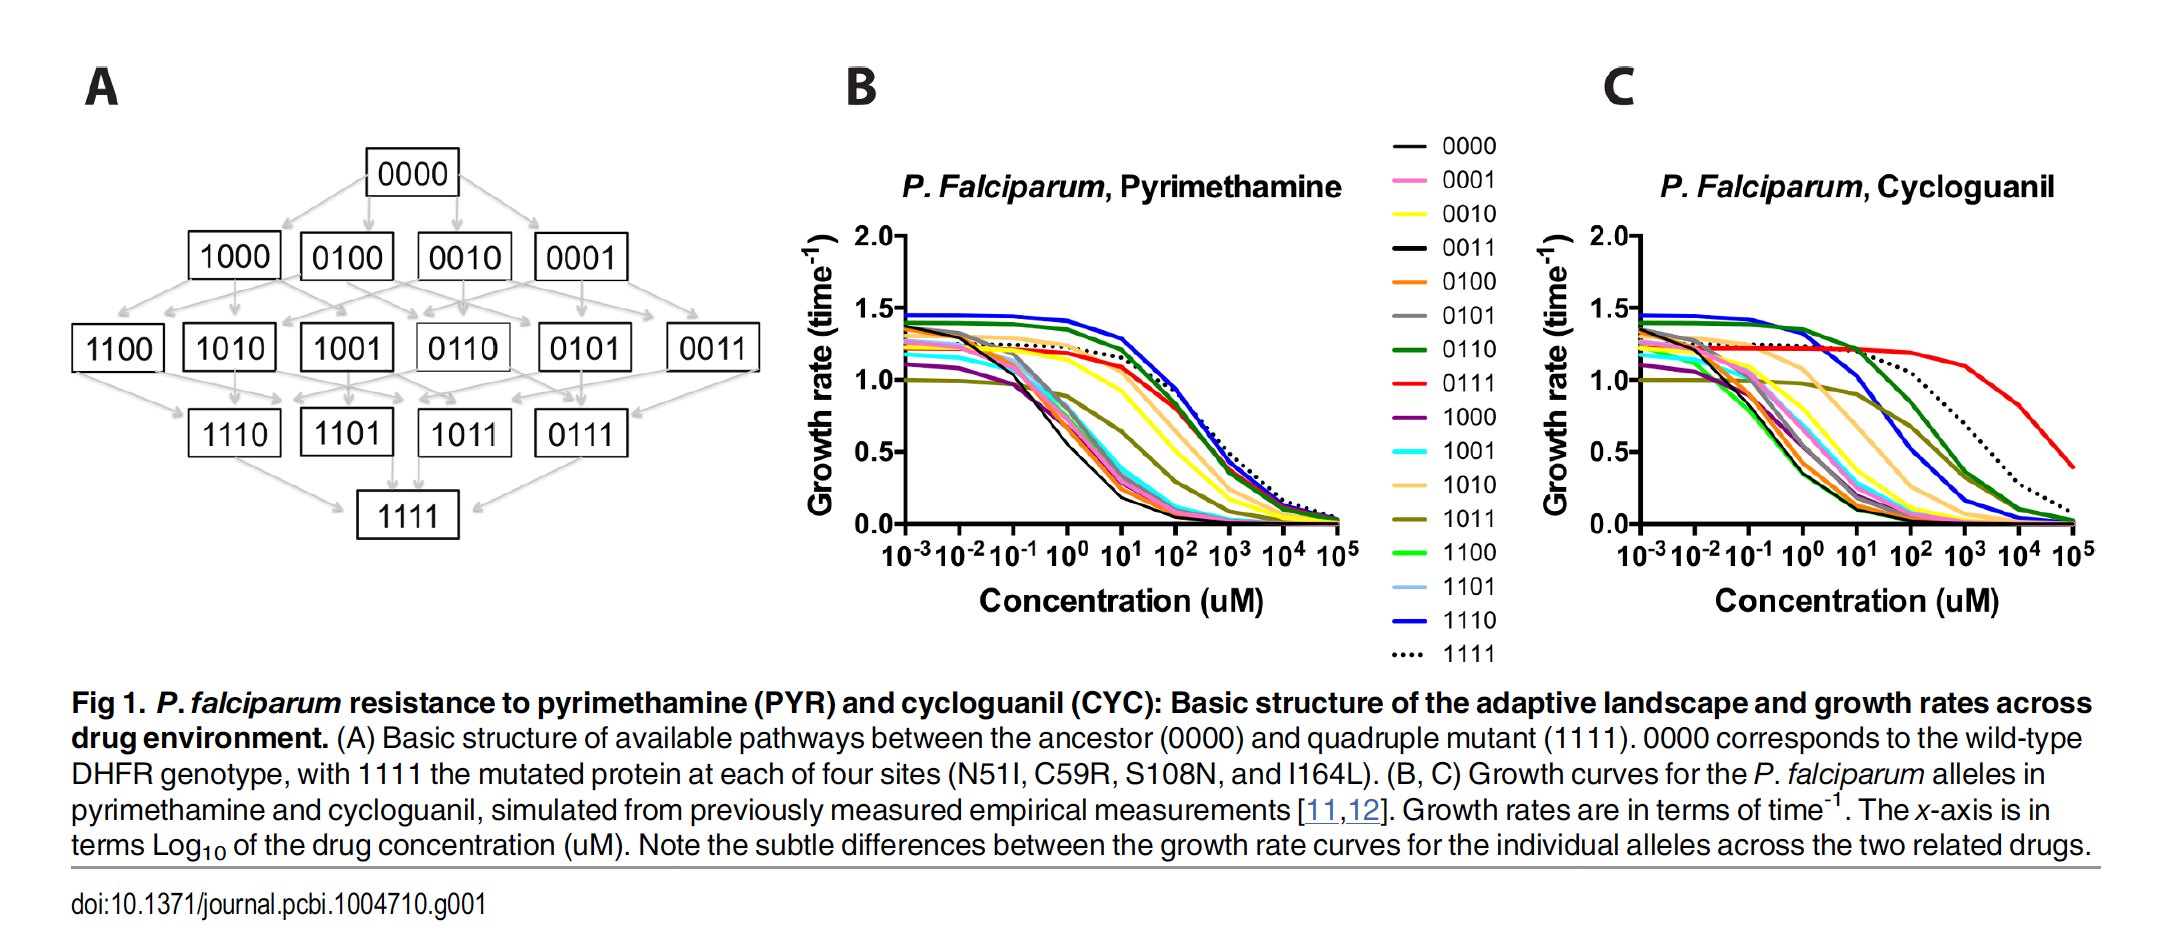

In [15]:
tempData = np.loadtxt("weinreich_temp_modifiedlabels.csv", delimiter = ",", skiprows=1)

In [17]:
print(tempData)

[[0.000000e+00 1.130000e+01 5.650000e+00 2.000000e+00 1.750000e-01
  9.000000e-02 1.563500e-02]
 [1.000000e+00 7.244500e+02 2.561250e+02 2.561250e+02 2.000000e+00
  1.000000e+00 1.750000e-01]
 [1.000000e+01 1.130000e+01 8.000000e+00 4.000000e+00 1.250000e-01
  1.250000e-01 2.000000e-02]
 [1.100000e+01 7.244500e+02 2.561250e+02 5.122500e+02 6.403000e+01
  9.055000e+01 5.650000e+00]
 [1.000000e+02 2.265000e+01 1.130000e+01 1.130000e+01 1.750000e-01
  2.500000e-01 9.000000e-02]
 [1.010000e+02 4.098000e+03 2.049000e+03 2.897700e+03 3.622000e+02
  4.530000e+01 1.400000e+00]
 [1.100000e+02 1.601000e+01 1.130000e+01 1.601000e+01 2.500000e-01
  2.500000e-01 1.250000e-01]
 [1.110000e+02 8.096000e+03 4.098000e+03 4.098000e+03 1.448700e+03
  1.024500e+03 3.622000e+02]
 [1.000000e+03 1.601000e+01 5.650000e+00 5.650000e+00 9.000000e-02
  1.250000e-01 4.500000e-02]
 [1.001000e+03 1.024500e+03 7.244500e+02 7.244500e+02 1.280600e+02
  1.811000e+02 5.650000e+00]
 [1.010000e+03 8.000000e+00 4.000000e+00

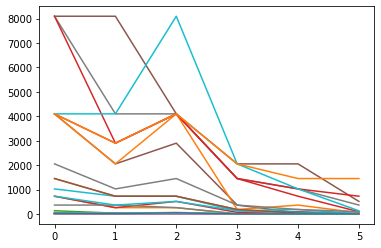

In [18]:
for i in range(tempData.shape[0]):
    plt.plot(tempData[i, 1:])

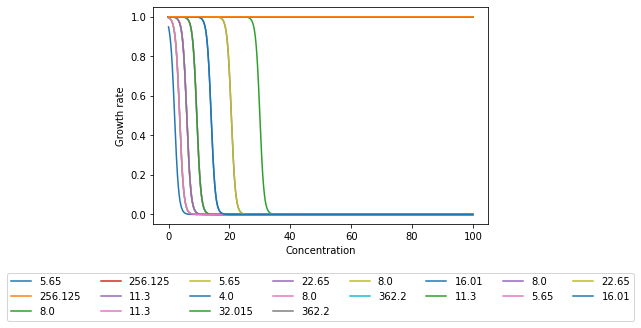

In [48]:
c = -.6824968


concentrations = np.arange(0, 100, .01)


MIC_25 = tempData[:, 2]


#print(MIC_25)
#growthrates = 1/(1+19*np.e**(MIC[i]-concentrations)
#print(concentrations)

for i in range(len(MIC_25)):
    try:
        plt.plot(concentrations, 1/(1+19*np.e**((MIC_25[i]-concentrations)/c)), label = MIC_25[i])
    except FloatingPointError:
         plt.plot(concentrations, np.ones(len(concentrations)))

plt.xlabel("Concentration")
plt.ylabel("Growth rate")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol = 8)

plt.savefig("Growth rates from MICs.png")

Text(0, 0.5, 'drug conc cc[t]')

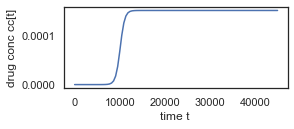

In [57]:
#A (iii): 
# Setting choice of dosage protocol cc(t)

def cc(t) :
    cct=0.00015/(1. + np.exp(-.002*(t - 10000 - 110)))
    return cct
                    
t = np.linspace(0,45000,100)
fig = plt.figure(figsize=(4,1.5))
plt.plot(t,cc(t))
plt.xlabel("time t ")
plt.ylabel("drug conc cc[t]")

In [72]:
c = -.6824968
cs = c*np.ones(tempData.shape[0])
drugless = np.ones(tempData.shape[0])

def sfc(conc, drugless, mic, cs):
    ut = np.zeros(tempData.shape[0])
    ut32 = drugless[31]/(1+np.exp((np.log(mic[31])-np.log10(conc))/cs[31]))
    for i in range(tempData.shape[0]):
        try:
            ut[i] = drugless[i]/(1+np.exp((np.log(mic[i])-np.log10(conc))/cs[i]))/ut32-1
        except FloatingPointError:
            ut[i] = 100000
        
    return ut

In [79]:
# A (iv.ii):  
# Exporting s(t) in input form needed for simulations s-> - s/(1+s)

MIC41 = tempData[:, 6]
print(MIC41)

ssim=[]
for i in range(0,45000):
    si=sfc(cc(i),drugless,MIC41,cs)
    for j in range(32):
        try:
            si[j] = -si[j]/(1.+si[j])
        except FloatingPointError:
            si[j]=1.e7 
    ssim.append(si)

ssim.append(si)

##J: need to figure out why s(t) needs to be in this form for simulations

[1.563500e-02 1.750000e-01 2.000000e-02 5.650000e+00 9.000000e-02
 1.400000e+00 1.250000e-01 3.622000e+02 4.500000e-02 5.650000e+00
 1.750000e-01 4.530000e+01 5.000000e-01 9.055000e+01 2.500000e-01
 5.122500e+02 6.250000e-02 2.500000e-01 2.500000e-01 1.601000e+01
 9.000000e-02 2.000000e+00 1.750000e-01 7.244500e+02 6.250000e-02
 4.000000e+00 9.000000e-02 9.055000e+01 2.500000e-01 1.280625e+02
 5.000000e-01 1.448700e+03]


In [80]:
ssim=np.asarray(ssim) 
np.savetxt("sTestT41.csv", ssim, delimiter=",")

In [81]:
# A (v): 
# st=table of selection coefficients. Time entries row wise
# dst= st time derivatives
st=[]
for i in range(45001):
    st.append(sfc(cc(i),drugless,MIC41,cs))
st=np.asarray(st) 
dst=np.diff(st, axis = 0)



In [82]:
# A (vi): 
# Interpolating s(t) and ds(t)
# si[t,i]: Interpolation function for st[t,i]. t=time,i=genotype 
# dsi[t,i]: Interpolation function for dst[t,i]

si=[];dsi=[]
t = np.arange(0, 45001)
for i in range(32):
    ysi=st[:,i] 
    ydsi=dst[:,i]
    tck_si = inp.splrep(t, ysi,k=3,s=0) 
    tck_dsi = inp.splrep(t[1:,], ydsi,k=3,s=0) 
    ysin = inp.splev(t, tck_si, der=0)
    ydsin = inp.splev(t[1:,], tck_dsi, der=0)#
    si.append(ysin)
    dsi.append(ydsin)

si=np.transpose(np.asarray(si)) #putting time row wise
dsi=np.transpose(np.asarray(dsi))

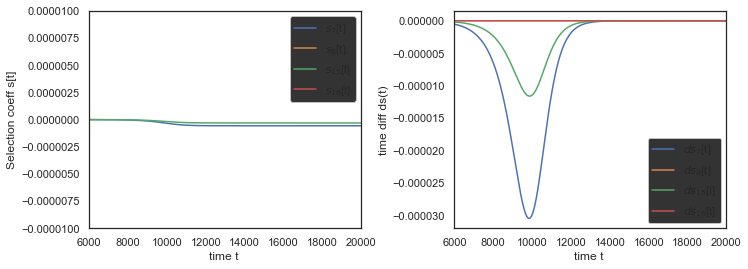

In [85]:
t = np.linspace(0,45000,45001)
dt =t[1:,]
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(t,si[:,7],t,si[:,8],t,si[:,15],t,si[:,16])
ax1.set_ylim([-0.00001,0.00001])
ax1.set_xlim([6000,20000])
ax1.set_xlabel("time t ")
ax1.set_ylabel("Selection coeff s[t]")
ax1.legend((r"$s_7$[t]","$s_8$[t]","$s_{15}$[t]","$s_{16}$[t]"))
ax2.plot(dt,dsi[:,6],dt,dsi[:,7],dt,dsi[:,14],dt,dsi[:,15])
ax2.set_xlim([6000,20000])
ax2.set_xlabel("time t ")
ax2.set_ylabel("time diff ds(t)")
ax2.legend((r"$ds_7$[t]","$ds_8$[t]","$ds_{15}$[t]","$ds_{16}$[t]"))
ratio = 0.8
for ax in [ax1,ax2]:
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.set_aspect(abs((xmax-xmin)/(ymax-ymin))*ratio, adjustable='box')
    
plt.savefig("teenyselectioncoefficient.png")

In [82]:
node_colors = [5, 10, 7, 9, 12, 4, 5, 23]
print(node_colors)

node_colors += 3*np.random.random(8)
print(node_colors)

[5, 10, 7, 9, 12, 4, 5, 23]
[ 6.2862445  11.72513634  8.74790784 10.04555959 14.48696237  6.21207942
  7.22848583 24.46331237]
